In [41]:
# import the necessary libraries
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot, skew
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import re
import warnings
warnings.filterwarnings(action='ignore')

In [42]:
df = pd.read_csv(r"C:\Users\spoor\Downloads\FLU_NEW.csv")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60729 entries, 0 to 60728
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VAERS_ID      60729 non-null  int64  
 1   STATE         60729 non-null  object 
 2   AGE_YRS       60729 non-null  float64
 3   SEX           60729 non-null  int64  
 4   SYMPTOM_TEXT  60729 non-null  object 
 5   DIED          60729 non-null  int64  
 6   L_THREAT      60729 non-null  int64  
 7   HOSPITAL      60729 non-null  int64  
 8   HOSPDAYS      60729 non-null  float64
 9   DISABLE       60729 non-null  int64  
 10  RECOVD        60729 non-null  int64  
 11  VAX_DATE      60729 non-null  object 
 12  ONSET_DATE    60729 non-null  object 
 13  NUMDAYS       60729 non-null  int64  
 14  OTHER_MEDS    60729 non-null  object 
 15  CUR_ILL       60729 non-null  object 
 16  HISTORY       60729 non-null  object 
 17  BIRTH_DEFECT  60729 non-null  int64  
 18  ALLERGIES     60729 non-nu

In [44]:
df.describe()

,VAERS_ID,AGE_YRS,SEX,DIED,L_THREAT,HOSPITAL,HOSPDAYS,DISABLE,RECOVD,NUMDAYS,BIRTH_DEFECT,SERIOUS
count,6.072900e+04,60729.000000,60729.000000,60729.000000,60729.000000,60729.000000,60729.000000,60729.000000,60729.000000,60729.000000,60729.000000,60729.000000
mean,1.496947e+06,50.790590,0.302705,0.006702,0.021176,0.076240,0.461361,0.037923,0.905465,25.532019,0.000543,0.183043
std,8.194052e+05,22.000503,0.467744,0.081591,0.143972,0.265384,3.515256,0.191011,0.789040,594.550895,0.023305,0.386705
min,7.012670e+05,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.881000e+05,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.924150e+05,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.488398e+06,68.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000
max,2.793895e+06,90.000000,2.000000,1.000000,1.000000,1.000000,236.000000,1.000000,2.000000,36530.000000,1.000000,1.000000


In [45]:
# Check if duplicates have been dropped
df.drop_duplicates(inplace=True)
df.duplicated().value_counts()

False    60646
Name: count, dtype: int64

In [46]:
df.head()

,VAERS_ID,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,L_THREAT,HOSPITAL,HOSPDAYS,DISABLE,...,BIRTH_DEFECT,ALLERGIES,VAX_MANU,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,SERIOUS
0,701267,IL,18.0,1,REPORTED NOT FEELING WELL AND ITCHY THROAT NP ...,0,0,0,0.0,0,...,0,,"SEQIRUS, INC.",INFLUENZA (SEASONAL) (AFLURIA QUADRIVALENT),MALAISE,PHARYNGEAL OEDEMA,THROAT IRRITATION,,,0
1,702372,WA,50.0,0,MUSCLE ACHE IN INJECTION SITE AND DOWN THE ARM...,0,0,0,0.0,0,...,0,,NOVARTIS VACCINES AND DIAGNOSTICS,INFLUENZA (SEASONAL) (FLUVIRIN),INJECTION SITE PAIN,,,,,0
2,702471,NE,55.0,1,WITH IN A WEEK MY LEFT SHOULDER HURT SO BAD I ...,0,0,0,0.0,0,...,0,,SANOFI PASTEUR,INFLUENZA (SEASONAL) (FLUZONE QUADRIVALENT),MUSCULOSKELETAL PAIN,PAIN,,,,0
3,702477,NJ,28.0,0,VACCINE GAVE ME THE FLU MADE ME HOT FLASHY AND...,0,0,0,0.0,0,...,0,,SANOFI PASTEUR,INFLUENZA (SEASONAL) (FLUZONE QUADRIVALENT),DIZZINESS,FEELING HOT,INFLUENZA,SYNCOPE,,1
4,702499,PA,72.0,1,INITIAL UNSOLICITED REPORT RECEIVED FROM A NUR...,0,0,0,0.0,0,...,0,,SANOFI PASTEUR,INFLUENZA (SEASONAL) (FLUZONE QUADRIVALENT),AGEUSIA,ASTHENIA,DECREASED APPETITE,FATIGUE,HEADACHE,0


In [47]:
df[['SYMPTOM_TEXT', 'OTHER_MEDS', 'HISTORY', 'ALLERGIES']].head()

,SYMPTOM_TEXT,OTHER_MEDS,HISTORY,ALLERGIES
0,REPORTED NOT FEELING WELL AND ITCHY THROAT NP ...,,,
1,MUSCLE ACHE IN INJECTION SITE AND DOWN THE ARM...,,,
2,WITH IN A WEEK MY LEFT SHOULDER HURT SO BAD I ...,DEPAKOTE INVEGA CHOLONZIPAM,,
3,VACCINE GAVE ME THE FLU MADE ME HOT FLASHY AND...,,,
4,INITIAL UNSOLICITED REPORT RECEIVED FROM A NUR...,,COMMENTS,


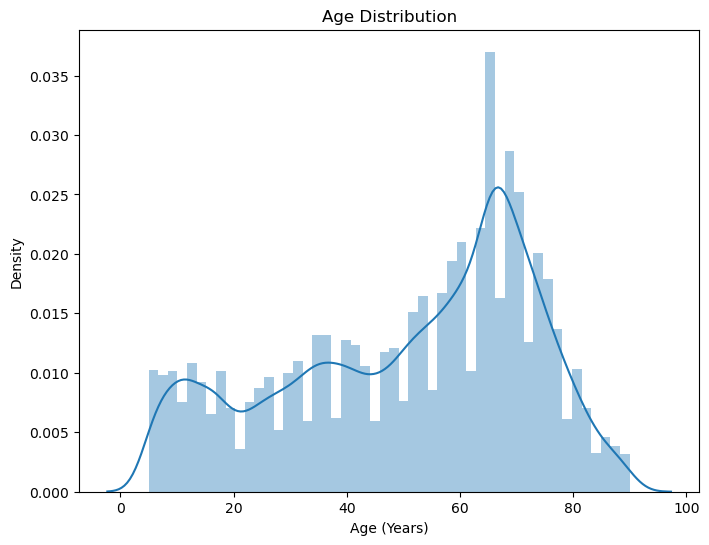

In [48]:
# Distplot
plt.figure(figsize=(8, 6))
sns.distplot(df['AGE_YRS'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age (Years)')
plt.ylabel('Density')
plt.show()

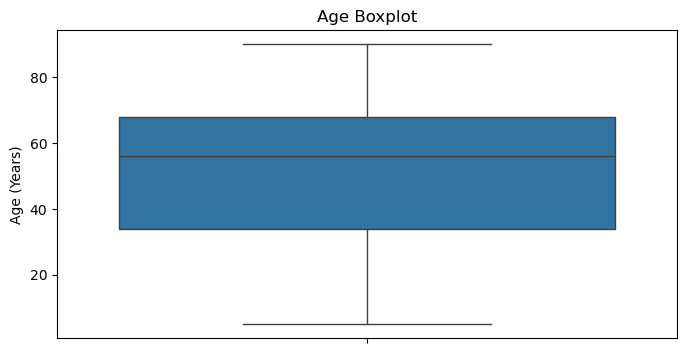

In [49]:
# Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(y=df['AGE_YRS'])
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')
plt.show()

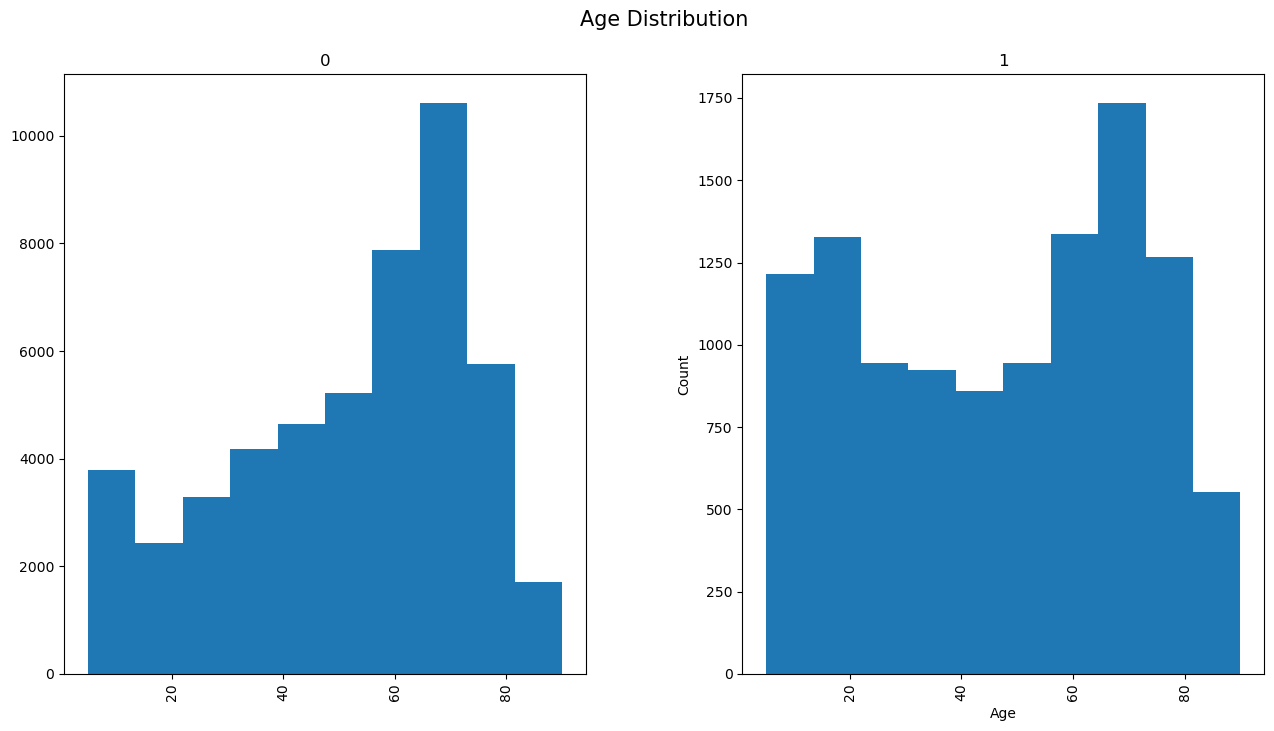

In [50]:
# Distribution of adverse event severity based on age
df['AGE_YRS'].hist(by=df['SERIOUS'], figsize=(15,8))
plt.xlabel('Age')
plt.ylabel('Count')
plt.suptitle('Age Distribution', fontsize=15);

In [51]:
plt.figure(figsize=(15,8))
labels = df['VAX_MANU'].value_counts().index
values = df['VAX_MANU'].value_counts().values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3,marker_colors = [
                      'rgb(229, 134, 6)', 'rgb(93, 105, 177)', 'rgb(82, 188, 163)'])])
fig.show()

<Figure size 1500x800 with 0 Axes>

In [52]:
labels = df['VAX_MANU'].value_counts().index
values1 = df[df['SERIOUS'] == 1].VAX_MANU.value_counts().values
values2 = df[df['SERIOUS'] == 0].VAX_MANU.value_counts().values

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values= values1, name="Serious case",marker_colors = [ 'rgb(229, 134, 6)', 'rgb(93, 105, 177)', 'rgb(82, 188, 163)']),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=values2, name="Non Serious case",marker_colors = [ 'rgb(229, 134, 6)', 'rgb(93, 105, 177)', 'rgb(82, 188, 163)']),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Seriousness of Vaccine Manufacturer",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Serious', x=0.18, y=0.5, font_size=10, showarrow=False),
                 dict(text='Non Serious', x=0.82, y=0.5, font_size=10, showarrow=False)])
fig.show()

In [53]:
# As unknown manufacturer are negligible 
df = df[~df['VAX_MANU'].isin(['UNKNOWN MANUFACTURER'])]  

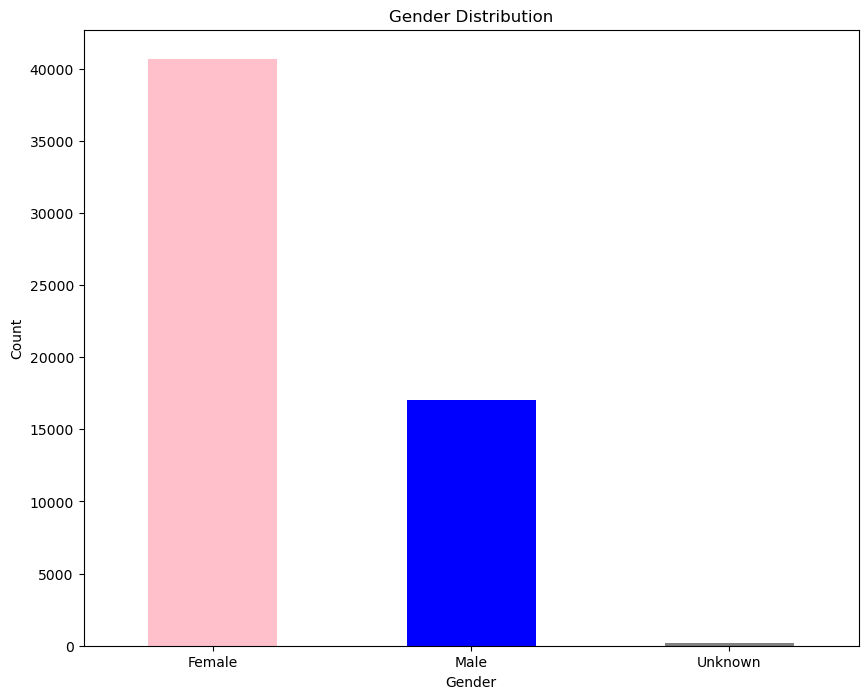

In [54]:
gender_mapping = {0: 'Female', 1: 'Male', 2: 'Unknown'}
df['Gender'] = df['SEX'].map(gender_mapping)

plt.figure(figsize=(10,8))
route = df['Gender'].value_counts()

# Define colors for each gender category
colors = {'Female': 'pink', 'Male': 'blue', 'Unknown': 'gray'}

# Plot the bars with specific colors
route.plot(kind='bar', title='Gender Distribution', color=[colors[gender] for gender in route.index])

plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

In [55]:
gender_serious = (df.groupby(['SEX', 'SERIOUS']).size()
                  .sort_values(ascending=False)
                  .reset_index(name='count'))

# Define mappings
map_dict = {0: "Female", 1: "Male", 2: "Unknown"}
map_dict_s = {0: "Not Serious", 1: "Serious"}

# Apply mappings
gender_serious["SEX"] = gender_serious["SEX"].map(map_dict)
gender_serious["SERIOUS"] = gender_serious["SERIOUS"].map(map_dict_s)

# New color scheme
new_colors = {'Serious': 'darkorange', 'Not Serious': 'lightgreen'}

# Create the bar plot with new colors
fig = px.bar(gender_serious, x="SEX", y="count", color="SERIOUS", 
             title="Gender Seriousness Comparison",
             text_auto=True,
             color_discrete_map=new_colors)

# Update layout for better visualization
fig.update_layout(
    template="plotly_white",
    xaxis_title="Gender",
    yaxis_title="Count",
    legend_title="Seriousness"
)
fig.show()

In [56]:
# drop all rows with unkown SEX
df = df[df['SEX'] != 2]

In [57]:
age_serious = df[['AGE_YRS', 'SERIOUS']]
map_dict_s = {1: "Serious", 0 : "Non Serious"}
age_serious["SERIOUS"] = age_serious["SERIOUS"].map(map_dict_s)

bins = [10, 20, 30, 40, 50, 60,70,80,90]
group = ['< 20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
categories = pd.cut(age_serious['AGE_YRS'], bins, labels=group)
age_serious['AGE_CATEGORY'] = categories

In [58]:
age_serious_group = (age_serious.groupby(['AGE_CATEGORY', 'SERIOUS']).size() 
   .reset_index(name='count'))

# Sort the DataFrame by AGE_CATEGORY
age_serious_group['AGE_CATEGORY'] = pd.Categorical(age_serious_group['AGE_CATEGORY'], categories=group, ordered=True)
age_serious_group = age_serious_group.sort_values('AGE_CATEGORY')

# Create the plot
fig = px.bar(age_serious_group, x="AGE_CATEGORY", y="count", color="SERIOUS", 
             text_auto=True,
             color_discrete_sequence=px.colors.qualitative.Vivid,
             title="Age Category and seriousness comparison")
fig.update_layout(
    template="plotly",
    xaxis=dict(title_text="Age Category"),
    yaxis=dict(title_text="Count")
)
fig.show()

In [59]:
age_serious_sex = df[['AGE_YRS','SEX', 'SERIOUS']]
map_dict_s = {1: "Serious", 0 : "Non Serious"}
map_dict = {1: "Male", 0 : "Female"}
age_serious_sex["SERIOUS"] = age_serious_sex["SERIOUS"].map(map_dict_s)
age_serious_sex["SEX"] = age_serious_sex["SEX"].map(map_dict)
bins = [10, 20, 30, 40, 50, 60,70,80,90]
group = ['< 20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
categories = pd.cut(age_serious_sex['AGE_YRS'], bins, labels=group)

age_serious_sex['AGE_CATEGORY'] = categories
age_serious_sex1 = (age_serious_sex.groupby(['AGE_CATEGORY','SEX', 'SERIOUS']).size()  
   .reset_index(name='count'))

fig = go.Figure()

fig.update_layout(
    template="plotly",
    xaxis=dict(title_text="Age category and Gender"),
    yaxis=dict(title_text="count"),
    title="Age Category Vs Gender",
    barmode="stack",
)

colors = ['rgb(229, 134, 6)', 'rgb(93, 105, 177)']
for r, c in zip(age_serious_sex1.SERIOUS.unique(), colors):
    plot_df = age_serious_sex1[age_serious_sex1.SERIOUS == r]
    fig.add_trace(
        go.Bar(x=[plot_df.AGE_CATEGORY, plot_df.SEX], y=plot_df['count'], name=r, marker_color=c),
    )

fig

In [60]:
subset_df = df[['AGE_YRS','SEX','DIED','VAX_MANU']]
map_dict_d = {1: "Death", 0 : "No Death"}
map_dict = {1: "Male", 0 : "Female"}
subset_df["SEX"] = subset_df["SEX"].map(map_dict)
subset_df["DIED"] = subset_df["DIED"].map(map_dict_d)

bins = [10, 20, 30, 40, 50, 60,70,80,90]
group = ['< 20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
categories = pd.cut(subset_df['AGE_YRS'], bins, labels=group)

subset_df['AGE_CATEGORY'] = categories
subset_df

,AGE_YRS,SEX,DIED,VAX_MANU,AGE_CATEGORY
0,18.0,Male,No Death,"SEQIRUS, INC.",< 20
1,50.0,Female,No Death,NOVARTIS VACCINES AND DIAGNOSTICS,41-50
2,55.0,Male,No Death,SANOFI PASTEUR,51-60
3,28.0,Female,No Death,SANOFI PASTEUR,21-30
4,72.0,Male,No Death,SANOFI PASTEUR,71-80
...,...,...,...,...,...
60724,70.0,Male,No Death,SANOFI PASTEUR,61-70
60725,7.0,Female,No Death,SANOFI PASTEUR,NaN
60726,72.0,Female,No Death,"SEQIRUS, INC.",71-80
60727,72.0,Female,No Death,"SEQIRUS, INC.",71-80


In [61]:
subset_df1 = (subset_df.groupby(['AGE_CATEGORY','SEX', 'DIED']).size()  
   .reset_index(name='count'))

In [62]:
fig = go.Figure()

fig.update_layout(
    template="plotly",
    xaxis=dict(title_text="Age category and Gender"),
    yaxis=dict(title_text="count"),
    title="Age Category Vs Gender Vs Death/No Death",
    barmode="stack",
)

colors = ['rgb(229, 134, 6)', 'rgb(93, 105, 177)']
for r, c in zip(subset_df1.DIED.unique(), colors):
    plot_df = subset_df1[subset_df1.DIED == r]
    fig.add_trace(
        go.Bar(x=[plot_df.AGE_CATEGORY, plot_df.SEX], y=plot_df['count'], name=r, marker_color=c),
    )

fig

In [63]:
sub = subset_df[(subset_df["DIED"] == 'Death')]
sub = (sub.groupby(['DIED','VAX_MANU']).size()  
   .reset_index(name='count'))

In [64]:
sub

,DIED,VAX_MANU,count
0,Death,CSL LIMITED,4
1,Death,GLAXOSMITHKLINE BIOLOGICALS,45
2,Death,NOVARTIS VACCINES AND DIAGNOSTICS,6
3,Death,PROTEIN SCIENCES CORPORATION,7
4,Death,SANOFI PASTEUR,204
5,Death,"SEQIRUS, INC.",131


In [65]:
sub1 =(df.groupby(['VAX_MANU']).size()  
   .reset_index(name='count'))
sub1 = sub1.rename(columns={"count":"totalcount"})
sub1= sub1.merge(sub, on = 'VAX_MANU')
sub1.drop('DIED',axis=1,inplace=True)
sub1['Percentage'] = sub1['count'].div(sub1['totalcount']).round(4)*100

sub1

,VAX_MANU,totalcount,count,Percentage
0,CSL LIMITED,709,4,0.56
1,GLAXOSMITHKLINE BIOLOGICALS,11414,45,0.39
2,NOVARTIS VACCINES AND DIAGNOSTICS,2216,6,0.27
3,PROTEIN SCIENCES CORPORATION,2749,7,0.25
4,SANOFI PASTEUR,24858,204,0.82
5,"SEQIRUS, INC.",15506,131,0.84


In [66]:
subset_death = df[(df["DIED"] == 1)]
subset_death = subset_death[['VAERS_ID','SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5']]
subset_death['Symptoms'] = subset_death[['SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5']].apply(lambda x: ','.join(x.dropna()), axis=1)

subset_death

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,Symptoms
131,708450,DEATH,,,,,"DEATH, , , ,"
233,709438,DEATH,,,,,"DEATH, , , ,"
2198,716845,ACUTE KIDNEY INJURY,CHEST WALL ABSCESS,DEBRIDEMENT,ENCEPHALOPATHY,INCISIONAL DRAINAGE,"ACUTE KIDNEY INJURY,CHEST WALL ABSCESS,DEBRIDE..."
2199,716845,INTENSIVE CARE,NECROTISING FASCIITIS,SEPSIS,STAPHYLOCOCCUS TEST POSITIVE,WOUND INFECTION STAPHYLOCOCCAL,"INTENSIVE CARE,NECROTISING FASCIITIS,SEPSIS,ST..."
4377,723815,ASTHENIA,DEATH,DYSPNOEA,DYSSTASIA,FATIGUE,"ASTHENIA,DEATH,DYSPNOEA,DYSSTASIA,FATIGUE"
...,...,...,...,...,...,...,...
60258,2791360,PARAESTHESIA,PERIPHERAL SENSORIMOTOR NEUROPATHY,PROCEDURAL FAILURE,PULMONARY EMBOLISM,RADICULOPATHY,"PARAESTHESIA,PERIPHERAL SENSORIMOTOR NEUROPATH..."
60259,2791360,SENSORY LOSS,SPINAL STENOSIS,SUPRAVENTRICULAR EXTRASYSTOLES,THROMBOSIS,URINARY INCONTINENCE,"SENSORY LOSS,SPINAL STENOSIS,SUPRAVENTRICULAR ..."
60260,2791360,URINARY RETENTION,VENTRICULAR EXTRASYSTOLES,VISUAL TRACKING TEST ABNORMAL,,,"URINARY RETENTION,VENTRICULAR EXTRASYSTOLES,VI..."
60529,2792776,ASTHENIA,DEATH,,,,"ASTHENIA,DEATH, , ,"


In [67]:
subset_death = subset_death.groupby(['VAERS_ID','Symptoms']).size().reset_index().rename(columns={0:'count'})
df_all_sym = subset_death.groupby('VAERS_ID')['Symptoms'].apply(','.join).reset_index()
df_sym_id = df_all_sym.assign(Symptoms=df_all_sym.Symptoms.str.split(','))
df_sym1 = df_sym_id.explode('Symptoms')

In [68]:
df_sym1

,VAERS_ID,Symptoms
0,708450,DEATH
0,708450,
0,708450,
0,708450,
0,708450,
...,...,...
194,2793280,DEATH
194,2793280,
194,2793280,
194,2793280,


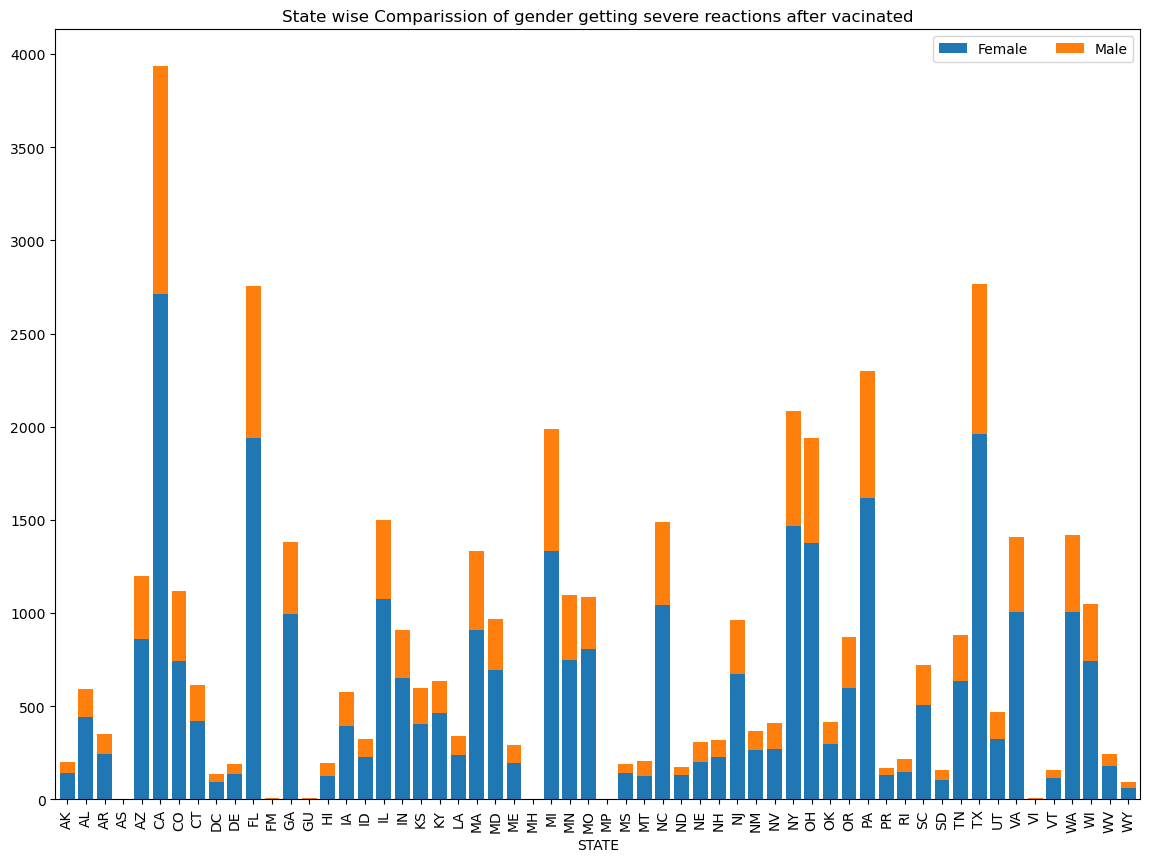

In [69]:
StateAnalysis = df[['VAERS_ID','STATE','VAX_MANU','SEX','AGE_YRS','DIED','RECOVD','SERIOUS']].drop_duplicates()
StateAnalysis = StateAnalysis[StateAnalysis['STATE'] != '']
pd.crosstab(StateAnalysis.STATE,StateAnalysis.SEX).plot.bar(stacked=True,width = .8,figsize=(14, 10))
plt.legend(['Female', 'Male'], loc='upper right', ncol = 3)
plt.title('State wise Comparission of gender getting severe reactions after vacinated', loc ='center')
plt.show()

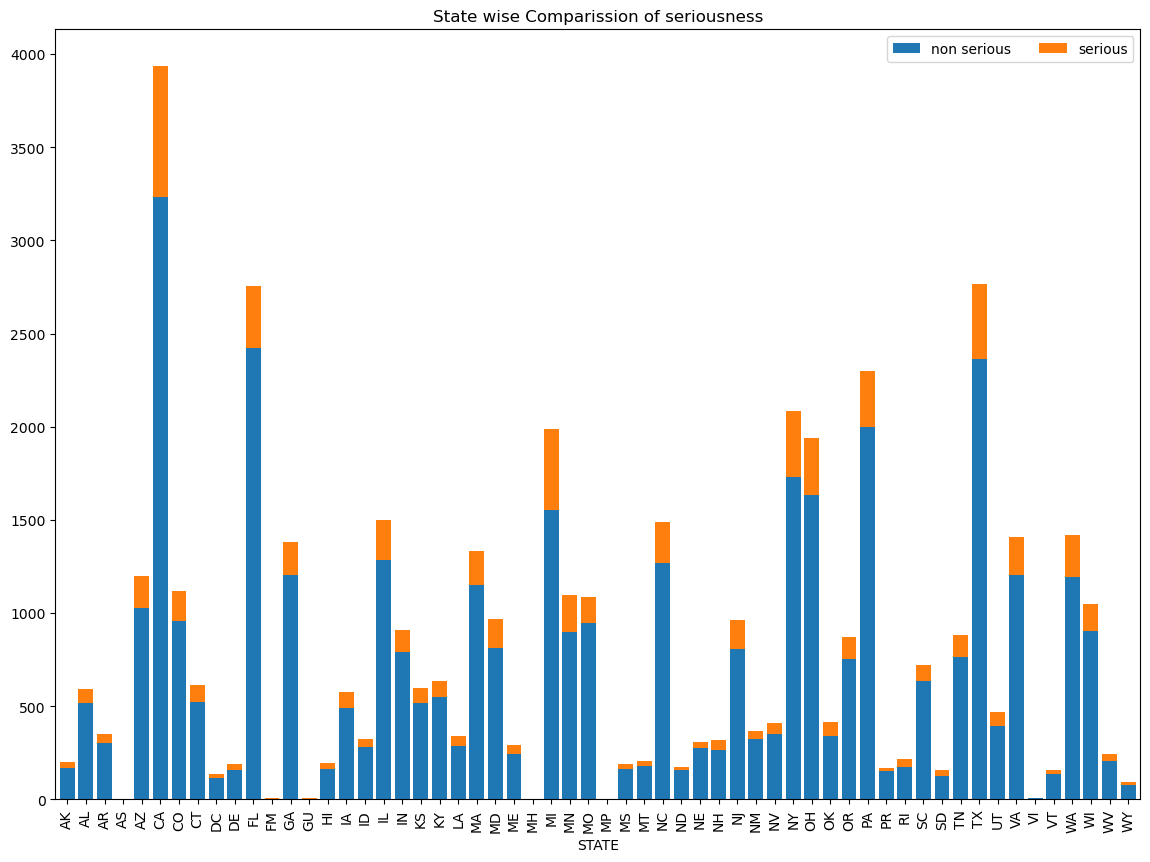

In [70]:
pd.crosstab(StateAnalysis.STATE,StateAnalysis.SERIOUS).plot.bar(stacked=True,width = .8,figsize=(14, 10))
plt.legend(['non serious', 'serious'], loc='upper right', ncol = 3)
plt.title('State wise Comparission of seriousness', loc ='center')
plt.show()

In [71]:
df_allergies = df.filter(['VAERS_ID','ALLERGIES','SERIOUS'], axis=1)
df_allergies.head()

,VAERS_ID,ALLERGIES,SERIOUS
0,701267,,0
1,702372,,0
2,702471,,0
3,702477,,1
4,702499,,0


In [72]:
df_allergies['ALLERGIES'] = df_allergies['ALLERGIES'].astype(str)

# Remove punctuation
df_allergies['ALLERGIES'] = df_allergies['ALLERGIES'].str.replace('[^\w\s]','')

# Convert to lower case
df_allergies['ALLERGIES'] = df_allergies['ALLERGIES'].map(lambda x: x.lower())

# Tokenize
df_allergies['ALLERGIES'] = df_allergies['ALLERGIES'].map(lambda x: x.split())
df_allergies.head()

,VAERS_ID,ALLERGIES,SERIOUS
0,701267,[],0
1,702372,[],0
2,702471,[],0
3,702477,[],1
4,702499,[],0


In [73]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Stop Words
stop_words=set(stopwords.words("english"))
df_allergies['ALLERGIES'] = df_allergies['ALLERGIES'].map(lambda x: [word for word in x if word not in stop_words])

# Stemming
stemmer = PorterStemmer()
df_allergies['ALLERGIES'] = df_allergies['ALLERGIES'].map(lambda x: [stemmer.stem(y) for y in x])
df_allergies.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\spoor\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\spoor\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,VAERS_ID,ALLERGIES,SERIOUS
0,701267,[],0
1,702372,[],0
2,702471,[],0
3,702477,[],1
4,702499,[],0


In [74]:
df_allergies.shape

(57679, 3)

In [75]:
df_allergies = df_allergies.explode('ALLERGIES', ignore_index=True)

df_allergies.head(10)

,VAERS_ID,ALLERGIES,SERIOUS
0,701267,NaN,0
1,702372,NaN,0
2,702471,NaN,0
3,702477,NaN,1
4,702499,NaN,0
5,702499,NaN,0
6,702575,penicillin,1
7,702575,penicillin,1
8,702737,NaN,1
9,702737,NaN,1


In [76]:
df_allergies['ALLERGIES'].value_counts(ascending = False)

ALLERGIES
allergi       4344
penicillin    4143
sulfa         3590
known         3423
nkda          2680
              ... 
relish           1
astromorph       1
reacton          1
entresto         1
heartburn        1
Name: count, Length: 5251, dtype: int64

In [77]:
# Only kepp allergies that are in more than 1000 patients
allergies_count = df_allergies.ALLERGIES.value_counts()
df_allergies = df_allergies[df_allergies.ALLERGIES.isin(allergies_count.index[allergies_count.gt(100)])]
df_allergies['ALLERGIES'].value_counts(ascending = False)

ALLERGIES
allergi       4344
penicillin    4143
sulfa         3590
known         3423
nkda          2680
              ... 
dander         110
seafood        108
biaxin         103
neomycin       103
reglan         102
Name: count, Length: 130, dtype: int64

In [78]:
df_allergies = df_allergies.drop(df_allergies[df_allergies.ALLERGIES.isin(["nan","past","updat","allerg","codein",
                                                                                                   "none","comment","document","drug",
                                                                                                   "vaccin","nka","nkda","allergi","food",
                                                                                                   "known","unknown","reaction","na","report", 
                                                                                                   "medic","n","see","pcn","ba"])].index)
df_allergies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37020 entries, 6 to 119816
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   VAERS_ID   37020 non-null  int64 
 1   ALLERGIES  37020 non-null  object
 2   SERIOUS    37020 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


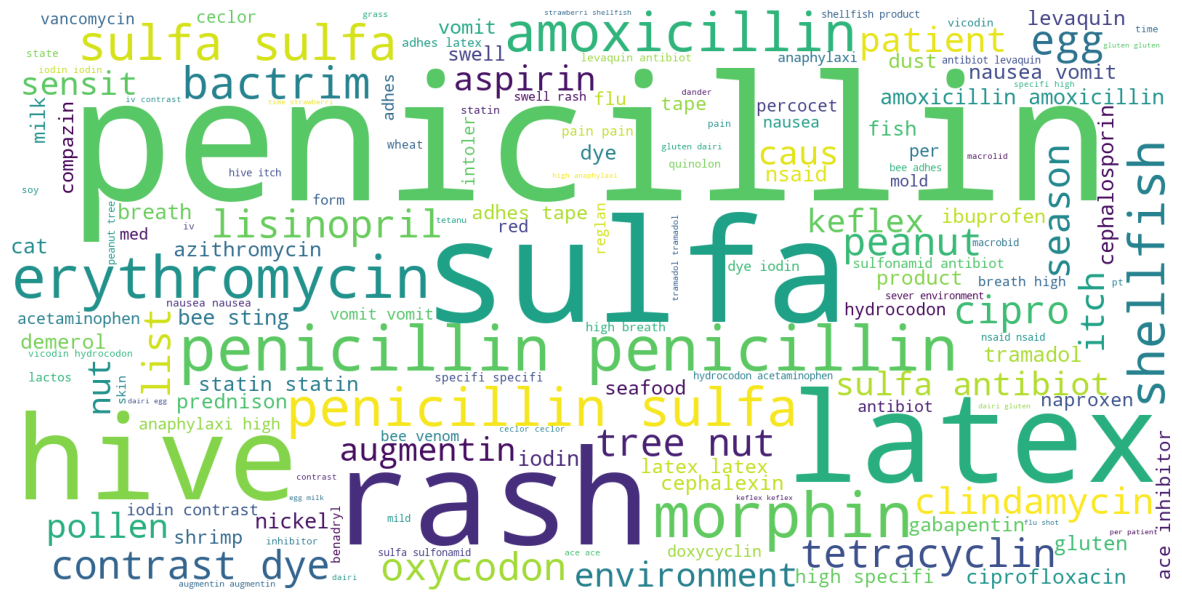

In [79]:
S_ALLERGIES  = df_allergies[df_allergies['SERIOUS']== 1]
wordcloud2 = WordCloud(width=1600, height=800, 
            background_color ='white',min_font_size = 10).generate(' '.join(S_ALLERGIES.ALLERGIES))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()     

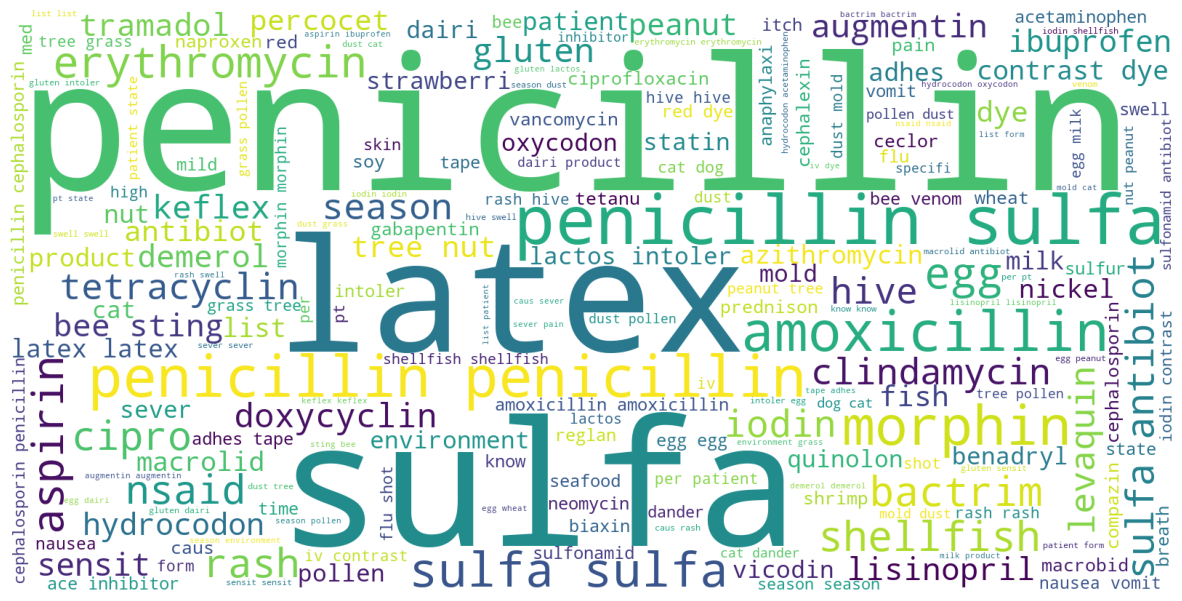

In [80]:
S_ALLERGIES  = df_allergies[df_allergies['SERIOUS']== 0]
wordcloud2 = WordCloud(width=1600, height=800, 
            background_color ='white',min_font_size = 10).generate(' '.join(S_ALLERGIES.ALLERGIES))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()     

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57679 entries, 0 to 60728
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VAERS_ID      57679 non-null  int64  
 1   STATE         57679 non-null  object 
 2   AGE_YRS       57679 non-null  float64
 3   SEX           57679 non-null  int64  
 4   SYMPTOM_TEXT  57679 non-null  object 
 5   DIED          57679 non-null  int64  
 6   L_THREAT      57679 non-null  int64  
 7   HOSPITAL      57679 non-null  int64  
 8   HOSPDAYS      57679 non-null  float64
 9   DISABLE       57679 non-null  int64  
 10  RECOVD        57679 non-null  int64  
 11  VAX_DATE      57679 non-null  object 
 12  ONSET_DATE    57679 non-null  object 
 13  NUMDAYS       57679 non-null  int64  
 14  OTHER_MEDS    57679 non-null  object 
 15  CUR_ILL       57679 non-null  object 
 16  HISTORY       57679 non-null  object 
 17  BIRTH_DEFECT  57679 non-null  int64  
 18  ALLERGIES     57679 non-null  o

In [82]:
df.drop(columns=['VAERS_ID','STATE','VAX_DATE','ONSET_DATE','NUMDAYS','VAX_NAME','Gender'],inplace=True)

In [83]:
df_flu_ML = df

In [84]:
df_flu_ML.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57679 entries, 0 to 60728
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AGE_YRS       57679 non-null  float64
 1   SEX           57679 non-null  int64  
 2   SYMPTOM_TEXT  57679 non-null  object 
 3   DIED          57679 non-null  int64  
 4   L_THREAT      57679 non-null  int64  
 5   HOSPITAL      57679 non-null  int64  
 6   HOSPDAYS      57679 non-null  float64
 7   DISABLE       57679 non-null  int64  
 8   RECOVD        57679 non-null  int64  
 9   OTHER_MEDS    57679 non-null  object 
 10  CUR_ILL       57679 non-null  object 
 11  HISTORY       57679 non-null  object 
 12  BIRTH_DEFECT  57679 non-null  int64  
 13  ALLERGIES     57679 non-null  object 
 14  VAX_MANU      57679 non-null  object 
 15  SYMPTOM1      57679 non-null  object 
 16  SYMPTOM2      57679 non-null  object 
 17  SYMPTOM3      57679 non-null  object 
 18  SYMPTOM4      57679 non-null  o

In [85]:
df_flu_ML.head()

,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,L_THREAT,HOSPITAL,HOSPDAYS,DISABLE,RECOVD,OTHER_MEDS,...,HISTORY,BIRTH_DEFECT,ALLERGIES,VAX_MANU,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,SERIOUS
0,18.0,1,REPORTED NOT FEELING WELL AND ITCHY THROAT NP ...,0,0,0,0.0,0,2,,...,,0,,"SEQIRUS, INC.",MALAISE,PHARYNGEAL OEDEMA,THROAT IRRITATION,,,0
1,50.0,0,MUSCLE ACHE IN INJECTION SITE AND DOWN THE ARM...,0,0,0,0.0,0,0,,...,,0,,NOVARTIS VACCINES AND DIAGNOSTICS,INJECTION SITE PAIN,,,,,0
2,55.0,1,WITH IN A WEEK MY LEFT SHOULDER HURT SO BAD I ...,0,0,0,0.0,0,0,DEPAKOTE INVEGA CHOLONZIPAM,...,,0,,SANOFI PASTEUR,MUSCULOSKELETAL PAIN,PAIN,,,,0
3,28.0,0,VACCINE GAVE ME THE FLU MADE ME HOT FLASHY AND...,0,0,0,0.0,0,1,,...,,0,,SANOFI PASTEUR,DIZZINESS,FEELING HOT,INFLUENZA,SYNCOPE,,1
4,72.0,1,INITIAL UNSOLICITED REPORT RECEIVED FROM A NUR...,0,0,0,0.0,0,0,,...,COMMENTS,0,,SANOFI PASTEUR,AGEUSIA,ASTHENIA,DECREASED APPETITE,FATIGUE,HEADACHE,0


In [87]:
df_flu_ML.to_csv(r'C:\Users\spoor\Downloads\flu_ML.csv', index=False)